In [18]:
"""
clean_country: Function that:
1.Remove the NaN values in the column 
2. Deduplicate the approaching names
3. Filter on Countries (ie that not contains 'Ocean' in their name)

"""


"""
clean_country: Function that:
1.Remove the NaN values in the column 
2. Deduplicate the approaching names
3. Filter on Countries (ie that not contains 'Ocean' in their name)

"""
def clean_country(column_name, dataframe):
    dataframe.dropna(subset=[column_name], inplace=True)
    dataframe[column_name] = dataframe[column_name].str.strip().str.upper().sort_values().replace(
        {
            "COAST OF AFRICA": "AFRICA",
            'ANDAMAN / NICOBAR ISLANDAS': 'ANDAMAN ISLANDS',
            'BRITISH ISLES': 'UNITED KINGDOM',
            'BRITISH NEW GUINEA': 'NEW GUINEA',
            'GRAND CAYMAN': 'CAYMAN ISLANDS',
            'CEYLON': 'SRI LANKA',
            'CEYLON (SRI LANKA)': 'SRI LANKA',
            'COAST OF AFRICA': 'AFRICA',
            'COLUMBIA': 'COLOMBIA',
            'ITALY / CROATIA': 'CROATIA',
            'SAN DOMINGO': 'DOMINICAN REPUBLIC',
            'EGYPT / ISRAEL': 'EGYPT',
            'RED SEA / INDIAN OCEAN': 'RED SEA',
            'INDIAN OCEAN?': 'INDIAN OCEAN',
            'IRAN / IRAQ': 'IRAN',
            'KOREA': 'SOUTH KOREA',
            'MALDIVE ISLANDS': 'MALDIVES',
            'NEVIS': 'ST KITTS / NEVIS',
            'NEW GUINEA': 'PAPUA NEW GUINEA',
            'ST. MAARTIN': 'ST MARTIN',
            'ST. MARTIN': 'ST MARTIN',
            'TOBAGO': 'TRINIDAD & TOBAGO',
            'THE BALKANS': 'SLOVENIA',
            'TURKS & CAICOS': 'TURKS AND CAICOS'
        }
    )
    dataframe = dataframe.loc[~dataframe[column_name].str.contains('OCEAN')]
    return dataframe[column_name]


"""
The function is returning a new dataframe filtered only on the states where more than X attacks did happen.
You can define the treshold in the "theshold" variable
NB: There are 107 states with more than 5 attacks, among them 50 with more than 10

"""

def states_attack_filtered(dataframe, column_name, threshold):
    dataframe[column_name] = dataframe[column_name].str.strip().str.upper()
    value_counts = dataframe[column_name].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index
    filtered_df = dataframe[dataframe[column_name].isin(filtered_values)]
    return filtered_df


def clean_type(type_text):
    if pd.isna(type_text):
        return 'Unknown'  

    type_text = type_text.lower()
    if 'unprovoked' in type_text:
        return 'Unprovoked'
    elif 'provoked' in type_text:
        return 'Provoked'
    
    return 'Other'


# def clean_species(species_text):
#     if pd.isna(species_text):
#         return species_text

#     for species in known_species:
#         if species.lower() in species_text.lower():
#             return species
#     return 'Unknown'  

def clean_species(species_text):
    if pd.isna(species_text):
        return 'Unknown'

    species_text_lower = species_text.lower()
    for species, keyword in known_species.items():
        if keyword in species_text_lower:
            return species
    return 'Unknown'




#Sirine's code
def fix_injury(x):
    if isinstance(x, float):
        return 'Unknown'
    x = x.lower()
    if 'incident' in x or 'injur' in x or 'small' in x or 'bit' in x or 'minor' in x\
    or 'survived' in x or 'grazed' in x or 'wound' in x or 'severed' in x or 'lacer' in x\
    or 'cut' in x or 'brok' in x or 'recov' in x or 'severed' in x or 'gash' in x or 'abra' in x\
    or 'scrap' in x or 'puncture' in x or 'ijnury' in x or 'inujur' in x or 'inury' in x or 'pinch' in x\
     or x in ['"lost leg"',
              'shark bumped him',
              'bumped by sharks',
              'non-life-threatening to left lower leg & foot',
              'left hand and  left leg',
              'hands, back and thigh inujured'
              
             ]:
        return 'Survived'
    elif 'kill' in x or 'fatal' in x or 'death' in x or 'disappeared' in x or 'drown' in x or 'remain' in x or x in [
        "human remains washed ahore",
        'sharks took some of the crew',
        'shark scavenged on his corpse',
        'human remains found in shark',
        'foot & swim fin punctured',
        'according to survivors, many people were taken by sharks',
        'swept out to sea, feared taken by shark',
        'missing, believed taken by a shark',
        "3.2 m [10.5'] shark caught 9 days later contained human remains thought to be those of canham"
    ]:
        return 'Fatal'
    elif x in ['no details', 'shark involvement not confirmed', 'unknown',
               'shark involvement suspected but not confirmed', 'questionable',
            'missing after a dive, shark involvement considered probable, but not confirmed']:
        return 'Unknown'
    else:
        return 'Unknown'

    
    
#Still some problem on the age cleaning
def set_age_group(x):
    if x.isdigit():
        if int(x) <= 12:
            return 'Child'
        elif int(x) <= 18:
            return 'Teen'
        elif int(x) <= 35:
            return 'Young Adult'
        elif int(x) <= 60:
            return 'Adult' 
        elif int(x) > 60:
            return 'Senior'
    elif x in ['18 months', '!2', '!6', '9 or 10', '8 or 10', '"young"', '7 or 8', '2 to 3 months', '6½', '12 or 13', '9 months',
                '10 or 12', '2½', 'a minor', 'young']:
        return 'Child'
    elif x in ['13 or 18', '13 or 14', '16 to 18', 'teen', 'Teens', 'a minor']:
        return 'Teen'
    elif x in ['18 or 20', '18 to 22', '20 ', '20?', "20's", '20s', '21 or 26', 'mid-20s', ' 28', '25 or 28', '25 to 35',
               '20/30', ' 30', 'Ca. 33', 'adult', '30 or 36', '31 or 33', '33 or 37', '30s', 'mid-30s',
               'adult', '(adult)']:
        return 'Young Adult'
    elif x in ['40s', ' 43', '45 ', '50s', '>50', '"middle-age"']:
        return 'Adult' 
    elif x in ['60s', "60's",  '74 ', 'Elderly']:
        return 'Senior'
    elif x != 'nan':
        return 'Unknown'
    else:
        return 'Unknown'


def fix_sex(x):
    if x in [' M', 'M ', 'M x 2']:
        return 'M'
    elif x in ["20s", 'lli', '.', 'N']:
        return 'Unknown'
    else:
        return x
    
def fix_activty(x):
    if isinstance(x, float):
        return 'Unknown'
    x = x.lower()
    if 'swimming' in x:
        return 'Swimming'
    elif 'diving' in x:
        return 'Diving'
    elif 'fish' in x or 'fihing' in x:
        return 'Fishing'
    elif 'surf' in x:
        return 'Surfing'
    elif 'snorkeling' in x:
        return 'Snorkeling'
    elif 'paddl' in x:
        return 'Paddle'
    elif 'boarding' in x:
        return 'Boarding'
    elif 'kayak' in x:
        return 'Kayaking'
    elif 'wading' in x:
        return 'wading'
    elif 'stand' in x:
        return 'Standing'
    elif 'float' in x:
        return 'Floating'
    elif 'bath' in x:
        return 'Bathing'
    elif 'canoe' in x:
        return 'Canoeing'
    else:
        return 'Unknown'
    
def extract_date(df):
    '''From column data extract information about month and year.
    Add this data as a new column in the data frame.'''
    
    # First fix some typos in data based on information in next rows    
    if df == '10-Jul-202':
        return df.replace("10-Jul-202","10-Jul-2020")
    elif df == '22-Jul-144':
        return df.replace("22-Jul-144","22-Jul-1944")
    
    # Find words starting with [DJF...] and followed by 4 digits, or range YYYY-YYYY or single YYYY
    import re
    
    pattern = r'\b([DJMASONF]\w*.\d{4}|\d{4}-\d{4}|\d{4})' 
    
    lst = re.findall(pattern, df)
  
    if len(lst) == 0:
        return None
    else:
        return "".join(lst)
    

def month(date):
    import re
    month = r'\b([DJMASONF]\w*)(?=\d*)'
    
    lst = re.findall(month, date)
  
    if len(lst) == 0:
        return None
    else:
        return "".join(lst)

#\b(\d{4}(?:-\d{4})?|\d{4})\b'

def year(date):
    import re
    year = r'\b\d{4}\b'   
    
    cleaned_date = re.sub(r'\D', '', date) 
    
    lst = re.findall(year, cleaned_date)
  
    if len(lst) == 0:
        return None
    else:
        return "".join(lst)
    
replace_month = {
    'Jun': 'June',
    'Nox': 'Nov',
    'May2014': 'May',
    'May2015': 'May',
    'April': 'Apr',
    'December': 'Dec',
    'Nov2013': 'Nov',
    'Jul': 'July',
    'November': 'Nov',
    'Ap': 'Apr',
    'Decp1896': 'Dec',
    'October': 'Oct',
    'March': 'Mar',
    'Sept': 'Sep',
    'August': 'Aug',
    'After' : '',
    'Summer': 'July',
    'Fall' : 'Sep'
}

known_species = {
    'Great White': 'white',
    'Tiger Shark': 'tiger',
    'Bull Shark': 'bull',
    'Blacktip Shark': 'blacktip',
    'Hammerhead': 'hammerhead',
    'White Shark': 'white',
    'Lemon Shark': 'lemon',
    'Cookiecutter Shark': 'cookiecutter',
    'Sand Shark': 'sand',
    'Nurse Shark': 'nurse'
}


In [19]:
import pandas as pd

shark_df = pd.read_excel('GSAF5.xls')


# #Initial cleaning 

shark_df.columns = shark_df.columns.str.strip()

shark_df = shark_df.drop(['Unnamed: 22', 'Unnamed: 21','pdf','Case Number','Case Number.1','href','href formula','Unnamed: 11','original order','Year','Source'], axis=1)

shark_df = shark_df.dropna(how='all') #remove last records with NaN values in each column




# # # Correctind date, extracting year and month

shark_df['Extracted_date'] = shark_df['Date'].astype(str).apply(extract_date)

shark_df['Month'] = shark_df['Extracted_date'].astype(str).apply(month)

shark_df['Month'] = shark_df['Month'].replace(replace_month)

shark_df['Year'] = shark_df['Extracted_date'].astype(str).apply(year)


# # # fixing Age and Sex columns

shark_df['Age'] = shark_df['Age'].astype(str)
shark_df['Age_group'] = shark_df['Age'].apply(set_age_group)


shark_df['Sex'] = shark_df['Sex'].apply(fix_sex)
shark_df['Sex'] = shark_df['Sex'].fillna('Unknown')
shark_df['Sex'] = shark_df['Sex'].astype(str)

shark_df['Activity'] = shark_df['Activity'].apply(fix_activty) 

# Species

shark_df['Species'] = shark_df['Species'].apply(clean_species)


# # injury

shark_df['Injury'] = shark_df['Injury'].apply(fix_injury)  #.value_counts()

shark_df['Type'] = shark_df['Type'].apply(clean_type)


# Country

shark_df['Country'] = clean_country('Country', shark_df)

shark_df_filtered = states_attack_filtered(shark_df, 'State', 5)

print(shark_df.shape)
#shark_df.tail(50)

(6872, 16)


In [20]:
shark_df_filtered.shape

(5404, 16)

In [21]:
shark_df_filtered = shark_df_filtered.dropna(subset='Year') 

In [22]:
shark_df_filtered['Year'].isna().sum()

0

In [23]:
shark_date_filtered = shark_df_filtered.copy()

#shark_date_filtered['Year'] = shark_df_filtered[shark_df_filtered['Year'].apply(int) > 1920].value_counts()

In [24]:
shark_date_filtered.drop('Name',axis=1, inplace=True)

In [25]:
shark_date_filtered = shark_date_filtered[shark_df_filtered['Year'].apply(int) > 1920]

In [26]:
shark_date_filtered

,Date,Type,Country,State,Location,Activity,Sex,Age,Injury,Time,Species,Extracted_date,Month,Year,Age_group
0,08 Dec-2023,Unprovoked,AUSTRALIA,QUEENSLAND,1770,Swimming,Unknown,nan,Survived,16h32,Unknown,Dec-2023,Dec,2023,Unknown
3,30 Nov-2023,Unprovoked,AUSTRALIA,QUEENSLAND,Clack Island,Swimming,M,21,Survived,11h30,Bull Shark,Nov-2023,Nov,2023,Young Adult
5,10 Nov-2023,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Port Noarlunga,Diving,F,32,Survived,13h20,Unknown,Nov-2023,Nov,2023,Young Adult
6,05 Nov-2023,Unprovoked,USA,FLORIDA,"Juno Beach, Palm Beach County",Swimming,M,66,Survived,10h30,Unknown,Nov-2023,Nov,2023,Senior
7,03 Nov-2023,Unprovoked,AUSTRALIA,WESTERM AUSTRALIA,Peak Island,Fishing,M,nan,Survived,14h00,Lemon Shark,Nov-2023,Nov,2023,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,A few years before 1938,Other,ITALY,ADRIATIC SEA,NaN,Fishing,M,nan,Survived,NaN,Great White,1938,None,1938,Unknown
6897,Before 1927,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Spectacle Island, Port Jackson",Unknown,M,nan,Unknown,NaN,Unknown,1927,None,1927,Unknown
6903,Before 1921,Unprovoked,USA,FLORIDA,"Gadsden Point, Tampa Bay",Fishing,M,nan,Survived,NaN,Unknown,1921,None,1921,Unknown
6905,Before 1921,Unprovoked,SOUTH AFRICA,KWAZULU-NATAL,Durban,Swimming,M,nan,Fatal,NaN,Unknown,1921,None,1921,Unknown


In [27]:
shark_date_filtered['Injury'].value_counts()

Injury
Survived    4152
Fatal        430
Unknown      160
Name: count, dtype: int64

In [164]:
shark_date_filtered['Country'].value_counts()

Country
USA                 2269
AUSTRALIA           1219
SOUTH AFRICA         540
PAPUA NEW GUINEA     100
BRAZIL                96
NEW ZEALAND           82
BAHAMAS               61
MEXICO                55
NEW CALEDONIA         36
MOZAMBIQUE            33
IRAN                  21
FRENCH POLYNESIA      19
CUBA                  19
ITALY                 16
FIJI                  16
EGYPT                 13
VANUATU               11
REUNION                9
VIETNAM                8
SPAIN                  8
ECUADOR                8
IRAQ                   8
INDONESIA              7
CROATIA                7
HONG KONG              7
JAMAICA                7
BERMUDA                6
KENYA                  6
PHILIPPINES            6
SENEGAL                6
JAPAN                  6
SOLOMON ISLANDS        4
INDIA                  4
SRI LANKA              4
UNITED KINGDOM         3
TONGA                  3
ISRAEL                 2
ENGLAND                2
MONTENEGRO             2
SIERRA LEONE     

In [165]:
shark_date_filtered['Type'].value_counts()

Type
Unprovoked    3594
Other          698
Provoked       440
Unknown         10
Name: count, dtype: int64

In [166]:
shark_date_filtered['Sex'].value_counts()

Sex
M          3781
F           602
Unknown     359
Name: count, dtype: int64

In [167]:
shark_date_filtered['Age_group'].value_counts()

Age_group
Unknown        1573
Young Adult    1351
Teen            734
Adult           705
Child           279
Senior          100
Name: count, dtype: int64

In [168]:
import seaborn as sns


In [173]:
shark_date_filtered.columns

Index(['Date', 'Type', 'Country', 'State', 'Location', 'Activity', 'Sex',
       'Age', 'Injury', 'Time', 'Species', 'Extracted_date', 'Month', 'Year',
       'Age_group'],
      dtype='object')

In [213]:
shark_date_filtered['Injury'].value_counts()

Injury
Survived    4152
Fatal        430
Unknown      160
Name: count, dtype: int64

In [224]:
survival_rate = shark_date_filtered.groupby('Injury')# .size()
survival_rate #.get_group('Fatal')

<Axes: xlabel='Injury', ylabel='count'>

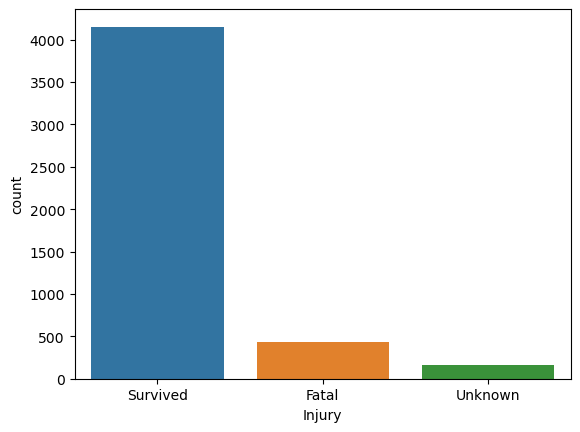

In [212]:
sns.countplot(x='Injury', data=shark_date_filtered) # percentage of survived vs not survived 

<Axes: xlabel='Age_group', ylabel='count'>

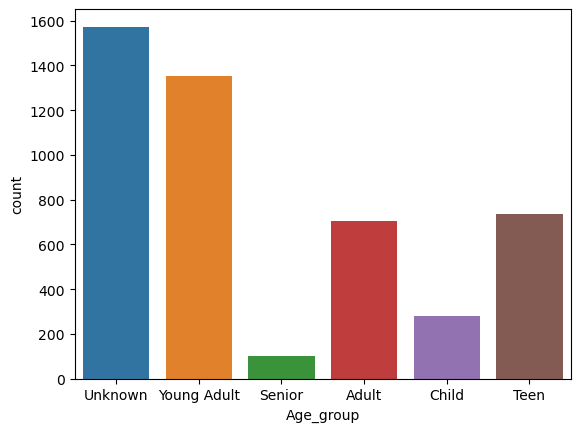

In [180]:
sns.countplot(x='Age_group', data=shark_date_filtered)

<Axes: xlabel='Type', ylabel='count'>

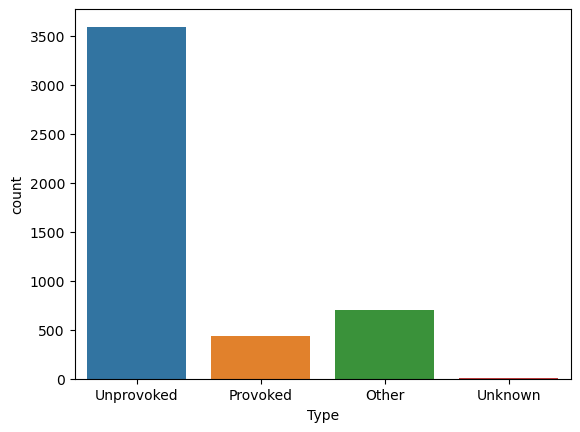

In [181]:
sns.countplot(x='Type', data=shark_date_filtered) # piechart

<Axes: xlabel='Month', ylabel='count'>

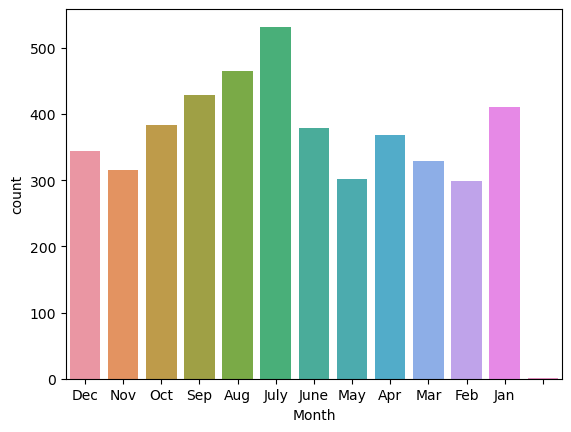

In [179]:
sns.countplot(x='Month', data=shark_date_filtered)

[Text(0, 0, 'Swimming'),
 Text(1, 0, 'Diving'),
 Text(2, 0, 'Fishing'),
 Text(3, 0, 'Surfing'),
 Text(4, 0, 'wading'),
 Text(5, 0, 'Snorkeling'),
 Text(6, 0, 'Boarding'),
 Text(7, 0, 'Unknown'),
 Text(8, 0, 'Standing'),
 Text(9, 0, 'Kayaking'),
 Text(10, 0, 'Paddle'),
 Text(11, 0, 'Floating'),
 Text(12, 0, 'Canoeing'),
 Text(13, 0, 'Bathing')]

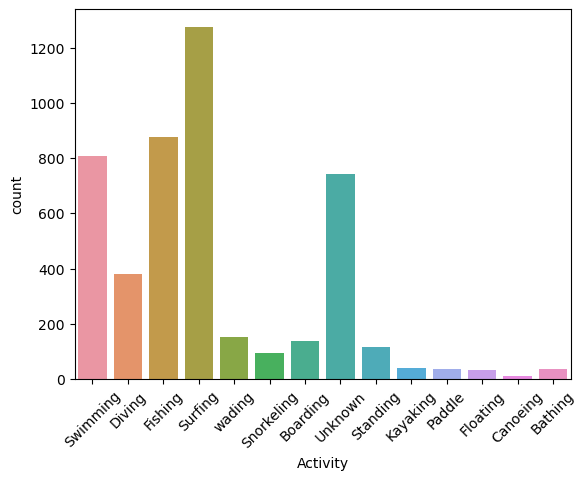

In [178]:
#sns.histplot(x='Activity', data=shark_date_filtered)

activity = sns.countplot(data=shark_date_filtered, x='Activity')

activity.set_xticklabels(activity.get_xticklabels(), rotation=45)

In [201]:
shark_date_filtered['Year'] = shark_date_filtered['Year'].apply(int)

shark_date_filtered.dtypes

Date              object
Type              object
Country           object
State             object
Location          object
Activity          object
Sex               object
Age               object
Injury            object
Time              object
Species           object
Extracted_date    object
Month             object
Year               int64
Age_group         object
dtype: object

In [202]:
year_country = shark_date_filtered.groupby(['Country','Year'])

In [193]:
year_country.count()

Date  Type  State  Location  Activity  Sex  Age  Injury  Time  \
Country   Year                                                                  
AUSTRALIA 1921     5     5      5         5         5    5    5       5     3   
          1922     9     9      9         9         9    9    9       9     6   
          1923    14    14     14        14        14   14   14      14     1   
          1924     6     6      6         6         6    6    6       6     4   
          1925     3     3      3         3         3    3    3       3     2   
...              ...   ...    ...       ...       ...  ...  ...     ...   ...   
VANUATU   2004     1     1      1         1         1    1    1       1     1   
          2005     1     1      1         1         1    1    1       1     1   
VIETNAM   2009     2     2      2         2         2    2    2       2     1   
          2010     6     6      6         6         6    6    6       6     5   
YEMEN     1955     1     1      1         1         1    1    1       1     0   

                Species  Extracted_date  Month  Age_group  
Country   Year                                             
AUSTRALIA 1921        5               5      5          5  
          1922        9               9      9          9  
          1923       14              14     14         14  
          1924        6               6      6          6  
          1925        3               3      3          3  
...                 ...             ...    ...        ...  
VANUATU   2004        1               1      1          1  
          2005        1               1      1          1  
VIETNAM   2009        2               2      2          2  
          2010        6               6      6          6  
YEMEN     1955        1               1      1          1  

[692 rows x 13 columns]

In [209]:
grouped_data = year_country.size().reset_index(name='Number of Attacks')
grouped_data

,Country,Year,Number of Attacks
0,AUSTRALIA,1921,5
1,AUSTRALIA,1922,9
2,AUSTRALIA,1923,14
3,AUSTRALIA,1924,6
4,AUSTRALIA,1925,3
...,...,...,...
687,VANUATU,2004,1
688,VANUATU,2005,1
689,VIETNAM,2009,2
690,VIETNAM,2010,6


In [260]:
average_attacks_per_year = grouped_data.groupby('Country')['Number of Attacks'].mean().reset_index(name='Average Attacks per Year')

plot_av_attacks = average_attacks_per_year.sort_values(by='Average Attacks per Year', ascending=False)



In [275]:
top_10 = plot_av_attacks.head(10)

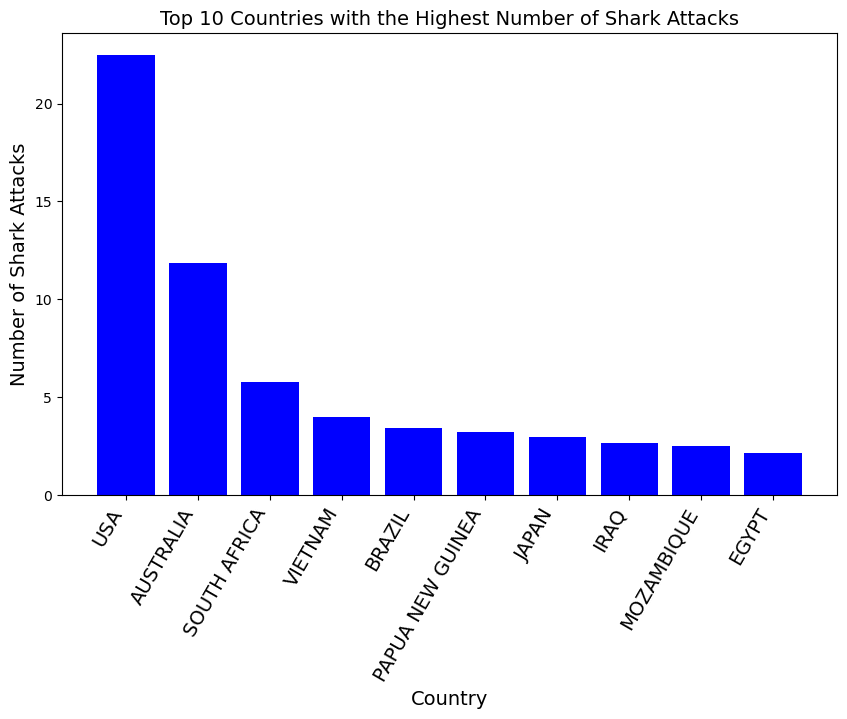

In [289]:
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['Average Attacks per Year'],color='blue')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Number of Shark Attacks', fontsize=14)
plt.title('Top 10 Countries with the Highest Number of Shark Attacks',fontsize=14)
plt.xticks(rotation=60, ha='right',fontsize=14)  # Rotate x-axis labels for better readability
plt.savefig('shark_attacks_colored.png', bbox_inches='tight')
plt.show()

In [272]:
others_sum = plot_av_attacks.iloc[10:]['Average Attacks per Year'].sum()

others_sum

46.10905133513829

In [185]:
country = shark_date_filtered.groupby(['Country'])

In [257]:
 shark_date_filtered['Country'].value_counts()

Country
USA                 2269
AUSTRALIA           1219
SOUTH AFRICA         540
PAPUA NEW GUINEA     100
BRAZIL                96
NEW ZEALAND           82
BAHAMAS               61
MEXICO                55
NEW CALEDONIA         36
MOZAMBIQUE            33
IRAN                  21
FRENCH POLYNESIA      19
CUBA                  19
ITALY                 16
FIJI                  16
EGYPT                 13
VANUATU               11
REUNION                9
VIETNAM                8
SPAIN                  8
ECUADOR                8
IRAQ                   8
INDONESIA              7
CROATIA                7
HONG KONG              7
JAMAICA                7
BERMUDA                6
KENYA                  6
PHILIPPINES            6
SENEGAL                6
JAPAN                  6
SOLOMON ISLANDS        4
INDIA                  4
SRI LANKA              4
UNITED KINGDOM         3
TONGA                  3
ISRAEL                 2
ENGLAND                2
MONTENEGRO             2
SIERRA LEONE     

In [191]:
# country['Year'].count()

Country
AUSTRALIA           1219
BAHAMAS               61
BERMUDA                6
BRAZIL                96
CANADA                 2
CROATIA                7
CUBA                  19
ECUADOR                8
EGYPT                 13
ENGLAND                2
FIJI                  16
FRENCH POLYNESIA      19
HONG KONG              7
INDIA                  4
INDONESIA              7
IRAN                  21
IRAQ                   8
ISRAEL                 2
ITALY                 16
JAMAICA                7
JAPAN                  6
KENYA                  6
MEXICO                55
MONTENEGRO             2
MOZAMBIQUE            33
NEW CALEDONIA         36
NEW ZEALAND           82
PANAMA                 2
PAPUA NEW GUINEA     100
PHILIPPINES            6
REUNION                9
REUNION ISLAND         1
SAUDI ARABIA           1
SENEGAL                6
SIERRA LEONE           2
SLOVENIA               1
SOLOMON ISLANDS        4
SOUTH AFRICA         540
SPAIN                  8
SRI LANKA        

In [229]:
monthly_attacks = shark_date_filtered.groupby('Month').size().reset_index(name='Number of Attacks')
monthly_attacks

,Month,Number of Attacks
0,,1
1,Apr,369
2,Aug,465
3,Dec,344
4,Feb,299
5,Jan,411
6,July,532
7,June,379
8,Mar,329
9,May,302


184

In [235]:
import matplotlib.pyplot as plt


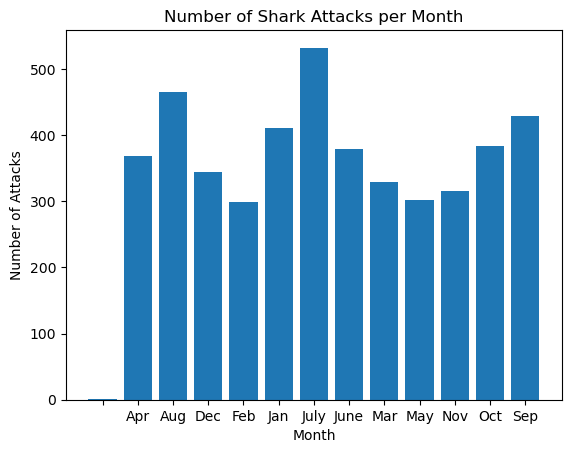

In [236]:
plt.bar(monthly_attacks['Month'], monthly_attacks['Number of Attacks'])
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Number of Shark Attacks per Month')
plt.show()

In [237]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(monthly_attacks['Month'], monthly_attacks['Number of Attacks'])

,Month,Number of Attacks
0,,1
1,Apr,369
2,Aug,465
3,Dec,344
4,Feb,299
5,Jan,411
6,July,532
7,June,379
8,Mar,329
9,May,302


In [241]:
shark_date_filtered['Year'].max()

2023

In [242]:
shark_date_filtered['Year'].min()

1921

In [295]:
#shark_attacks_per_country = shark_date_filtered['Country'].value_counts().reset_index()
#shark_attacks_per_country
#shark_date_filtered.groupby(['Country', 'Month']).mean()

per_month_per_country = shark_date_filtered.groupby(['Country', 'Month']).size().reset_index(name='Number of Shark Attacks')

In [297]:
pivot_df = per_month_per_country.pivot(index='Month', columns='Country', values='Number of Shark Attacks')

In [298]:
pivot_df

Country,AUSTRALIA,BAHAMAS,BERMUDA,BRAZIL,CANADA,CROATIA,CUBA,ECUADOR,EGYPT,ENGLAND,...,SPAIN,SRI LANKA,SUDAN,SUDAN?,TONGA,UNITED KINGDOM,USA,VANUATU,VIETNAM,YEMEN
Month,,,,,,,,,,,,,,,,,,,,,
,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apr,103.0,1.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,175.0,1.0,NaN,NaN
Aug,57.0,12.0,1.0,4.0,1.0,4.0,5.0,NaN,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,2.0,322.0,2.0,NaN,NaN
Dec,157.0,NaN,NaN,8.0,NaN,NaN,1.0,1.0,3.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
Feb,138.0,1.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,62.0,NaN,NaN,NaN
Jan,180.0,2.0,NaN,7.0,NaN,NaN,3.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,3.0,NaN
July,55.0,16.0,1.0,15.0,1.0,1.0,2.0,2.0,NaN,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,368.0,NaN,2.0,1.0
June,61.0,7.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,252.0,3.0,1.0,NaN
Mar,112.0,1.0,NaN,11.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,107.0,NaN,NaN,NaN


In [306]:
df_australia = shark_date_filtered[shark_date_filtered['Country'] == 'AUSTRALIA']

In [307]:
df_australia

,Date,Type,Country,State,Location,Activity,Sex,Age,Injury,Time,Species,Extracted_date,Month,Year,Age_group
0,08 Dec-2023,Unprovoked,AUSTRALIA,QUEENSLAND,1770,Swimming,Unknown,nan,Survived,16h32,Unknown,Dec-2023,Dec,2023,Unknown
3,30 Nov-2023,Unprovoked,AUSTRALIA,QUEENSLAND,Clack Island,Swimming,M,21,Survived,11h30,Bull Shark,Nov-2023,Nov,2023,Young Adult
5,10 Nov-2023,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Port Noarlunga,Diving,F,32,Survived,13h20,Unknown,Nov-2023,Nov,2023,Young Adult
7,03 Nov-2023,Unprovoked,AUSTRALIA,WESTERM AUSTRALIA,Peak Island,Fishing,M,nan,Survived,14h00,Lemon Shark,Nov-2023,Nov,2023,Unknown
10,31 Oct-2023,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Streaky Bay,Surfing,M,55,Fatal,10h20,Great White,Oct-2023,Oct,2023,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Reported 29-Aug-1929,Unprovoked,AUSTRALIA,TORRES STRAIT,NaN,Unknown,M,nan,Survived,NaN,Unknown,Aug-1929,Aug,1929,Unknown
6800,After 2013,Unprovoked,AUSTRALIA,QUEENSLAND,Otter Reef,Fishing,M,nan,Survived,NaN,Hammerhead,After 2013,,2013,Unknown
6834,1950s,Unprovoked,AUSTRALIA,TORRES STRAIT,NaN,Diving,M,nan,Survived,NaN,Tiger Shark,1950,None,1950,Unknown
6855,"No date, Before 1963",Unprovoked,AUSTRALIA,TORRES STRAIT,NaN,Diving,M,nan,Unknown,NaN,Unknown,1963,None,1963,Unknown


In [329]:
grouped_df_australia.reset_index(drop=True, inplace=True)

In [330]:
grouped_df_australia

,Month,Number of Shark Attacks
0,Apr,103
1,Aug,57
2,Dec,157
3,Feb,138
4,Jan,180
5,July,55
6,June,61
7,Mar,112
8,May,58
9,Nov,118


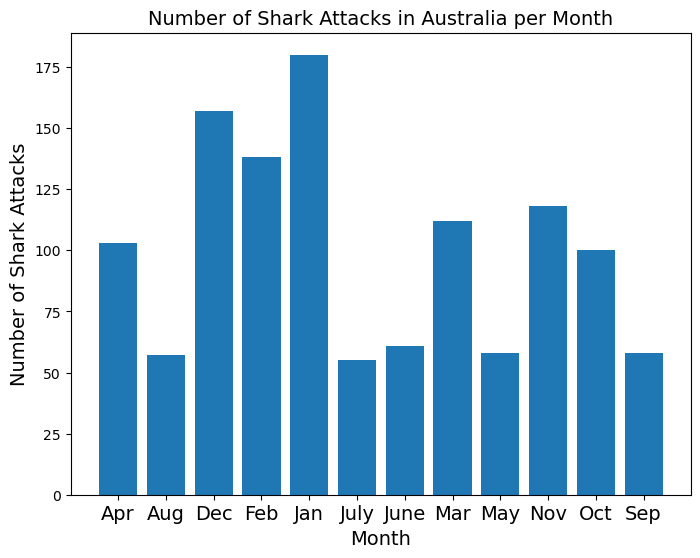

In [349]:
grouped_df_australia = df_australia.groupby('Month').size().reset_index(name='Number of Shark Attacks')

grouped_df_australia = grouped_df_australia.iloc[1:]

# month_order = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

# grouped_df_australia['Month'] = pd.Categorical(grouped_df_australia['Month'], categories=month_order, ordered=True)

# grouped_df_australia['Month'] = pd.Categorical(grouped_df_australia['Month'], categories=month_order, ordered=True)


# custom_month_order = ['Dec', 'Jan', 'Feb', 'Mar','Apr', 'May','June','July', 'Aug', 'Sep', 'Oct','Nov'] 


# Plot the data with custom order
plt.figure(figsize=(8, 6))
plt.bar(grouped_df_australia['Month'], grouped_df_australia['Number of Shark Attacks'])
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Shark Attacks', fontsize=14)
plt.title('Number of Shark Attacks in Australia per Month',fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('shark_attacks_Australia_per_month.png', bbox_inches='tight')
plt.show()
# Set the custom order of months on the x-axis


# Plot the data
# grouped_df_australia.plot(kind='bar', x='Month', y='Number of Shark Attacks', legend=False, figsize=(8, 6))
# plt.xlabel('Month',fontsize=14)
# plt.xticks(custom_month_order)
# plt.ylabel('Number of Shark Attacks')
# plt.title('Number of Shark Attacks in Australia per Month')

In [333]:
month_order = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

grouped_df_australia['Month'] = pd.Categorical(grouped_df_australia['Month'], categories=month_order, ordered=True)

In [334]:
grouped_df_australia

,Month,Number of Shark Attacks
1,Apr,103
2,Aug,57
3,Dec,157
4,Feb,138
5,Jan,180
6,July,55
7,June,61
8,Mar,112
9,May,58
10,Nov,118


In [336]:
month_order = ['Dec', 'Jan', 'Feb', 'Mar','Apr', 'May','June','July', 'Aug', 'Sep', 'Oct','Nov']

grouped_df_australia['Month'] = pd.Categorical(grouped_df_australia['Month'], categories=month_order, ordered=True)

grouped_df_australia

,Month,Number of Shark Attacks
1,Apr,103
2,Aug,57
3,Dec,157
4,Feb,138
5,Jan,180
6,July,55
7,June,61
8,Mar,112
9,May,58
10,Nov,118


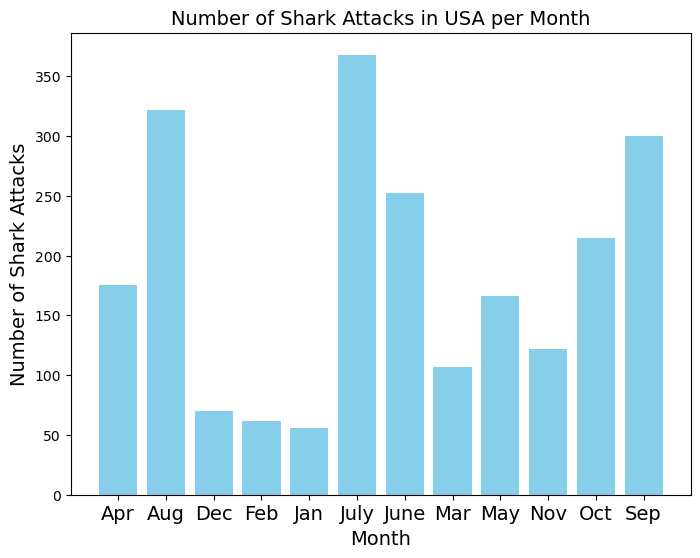

,Month,Number of Shark Attacks
0,Apr,175
1,Aug,322
2,Dec,70
3,Feb,62
4,Jan,56
5,July,368
6,June,252
7,Mar,107
8,May,166
9,Nov,122


In [13]:
import matplotlib.pyplot as plt

df_USA = shark_date_filtered[shark_date_filtered['Country'] == 'USA']


grouped_df_USA = df_USA.groupby('Month').size().reset_index(name='Number of Shark Attacks')

# grouped_df_USA = grouped_df_USA.iloc[1:]

# grouped_df_USA.reset_index(drop=True, inplace=True)


# # month_order = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

# # grouped_df_USA['Month'] = pd.Categorical(grouped_df_USA['Month'], categories=month_order, ordered=True)

# # grouped_df_USA['Month'] = pd.Categorical(grouped_df_USA['Month'], categories=month_order, ordered=True)


# # custom_month_order = ['Dec', 'Jan', 'Feb', 'Mar','Apr', 'May','June','July', 'Aug', 'Sep', 'Oct','Nov'] 


# Plot the data with custom order
plt.figure(figsize=(8, 6))
plt.bar(grouped_df_USA['Month'], grouped_df_USA['Number of Shark Attacks'],color='skyblue')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Shark Attacks', fontsize=14)
plt.title('Number of Shark Attacks in USA per Month',fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('shark_attacks_USA_per_month.png', bbox_inches='tight')
plt.show()
# Set the custom order of months on the x-axis

grouped_df_USA

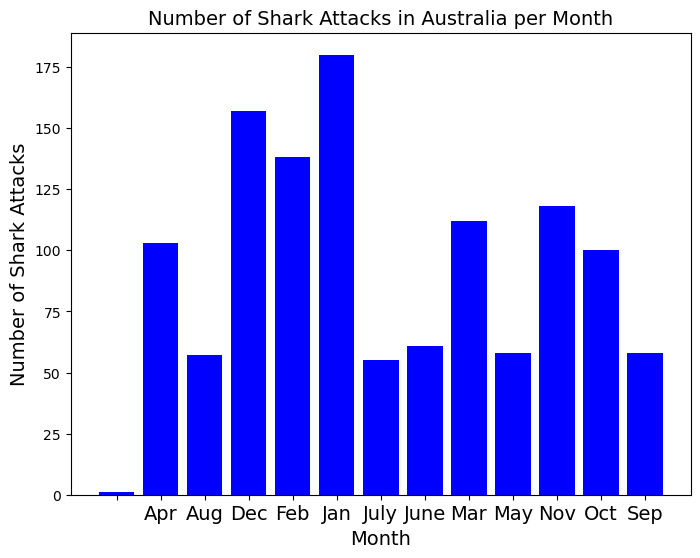

,Month,Number of Shark Attacks
0,,1
1,Apr,103
2,Aug,57
3,Dec,157
4,Feb,138
5,Jan,180
6,July,55
7,June,61
8,Mar,112
9,May,58


In [15]:
df_australia = shark_date_filtered[shark_date_filtered['Country'] == 'AUSTRALIA']


grouped_df_australia = df_australia.groupby('Month').size().reset_index(name='Number of Shark Attacks')

# grouped_df_USA = grouped_df_USA.iloc[1:]

# grouped_df_USA.reset_index(drop=True, inplace=True)


# # month_order = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

# # grouped_df_USA['Month'] = pd.Categorical(grouped_df_USA['Month'], categories=month_order, ordered=True)

# # grouped_df_USA['Month'] = pd.Categorical(grouped_df_USA['Month'], categories=month_order, ordered=True)


# # custom_month_order = ['Dec', 'Jan', 'Feb', 'Mar','Apr', 'May','June','July', 'Aug', 'Sep', 'Oct','Nov'] 


# Plot the data with custom order
plt.figure(figsize=(8, 6))
plt.bar(grouped_df_australia['Month'], grouped_df_australia['Number of Shark Attacks'],color='blue')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Shark Attacks', fontsize=14)
plt.title('Number of Shark Attacks in Australia per Month',fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('shark_attacks_Australia_per_month.png', bbox_inches='tight')
plt.show()
# Set the custom order of months on the x-axis

grouped_df_australia